Математическая статистика — раздел математики, который занимается систематизацией и обработкой данных для их использования и получения выводов.

## Описательная статистика

Когда вы описываете и вычисляете характеристики одной переменной, вы выполняете одномерный анализ. 

Например, вы хотите узнать больше о сомелье, которые давали подробный отзыв вину. Вы анализируете признак независимо от других, как будто в датасете не существует других признаков. Вы можете просмотреть, сколько сомелье приняло участие в обзоре вин. Можете проанализировать информацию и увидеть, какой сомелье чаще всего оценивал вино. Возможно, эта информация будет важна, и на этапе проектирования и преобразования признаков мы обработаем признаки на основе этих выводов. 

Когда вы анализируете пару переменных и больше, то вы делаете многомерный анализ. Целью такого анализа является нахождение связей между признаками. 

Мы можем проанализировать, есть ли связь между сортом винограда и ценой бутылки вина. Для этого используется корреляционный анализ, с которым мы познакомимся в следующем юните. Для оценки рейтинга вина можем оценить статистическую значимость переменных, которую мы изучим в следующих модулях. Например, если цена за бутылку вина окажется неважным признаком, то мы сможем удалить его из датасета, так как он не влияет на рейтинг вина.

In [1]:
import pandas as pd

In [3]:
wine_df=pd.read_csv('data/wine_cleared.csv')
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [4]:
wine_df['points'].min()

80

In [5]:
wine_df['price'].min()

4.0

**Мера центральной тенденции** — это число, которое описывает так называемое «среднее» признака. Мера центральной тенденции может рассчитываться по-разному в зависимости от типа признака или от его распределения.

In [6]:
import statistics

### Среднее арифметическое

Среднее арифметическое — сумма всех элементов, поделённая на количество элементов в числовом ряду или признаке (Series).

In [11]:
round(wine_df['price'].mean(), 2)

35.36

Среднее арифметическое хорошо работает для признаков с небольшим разбросом в значениях, например чтобы корректно вычислять средний возраст популяции. Однако оно плохо работает для признака с большим разбросом в значениях. 

### Медиана

Медиана — средний элемент распределения. Для расчёта медианы должно выполняться одно условие: числовой ряд должен быть предварительно отсортирован. Только так мы сможем корректно рассчитать средний элемент. Признак может быть отсортирован как по возрастанию, так и по убыванию. 

In [18]:
statistics.median(wine_df['price']) 

28.0

В отличие от среднего арифметического медиана хорошо справляется с разбросом в значениях, поэтому её чаще используют. Также медиана разбивает данные на две группы, состоящие из одинакового количества элементов.

Также в библиотеке statistics есть функции, связанные с медианой, — функция statistics.median_low() и функция statistics.median_high().

→ В случае, когда количество элементов в числовом ряду (серии) нечётное, функции возвращают то же, что и median().

В случае, когда количество элементов чётное, у нас получается два средних значения:

median_low() возвращает меньшее из них;

median_high() возвращает большее из них.

### Мода

Мода — самый часто встречающийся элемент в числовом ряду.

In [20]:
round(statistics.mode(wine_df['price']), 2)

35.36

Моду также можно вычислить при помощи statistics.multimode(). В случае наличия нескольких модовых (популярных значений) функция statistics.mode() вернёт вам ошибку StatisticsError, а statistics.multimode() — список с всеми вычисленными модовыми значениями.

Мы рассмотрели самые основные и часто используемые в машинном обучении меры центральной тенденции. Также к мерам центральной тенденции относятся:

среднее геометрическое;
среднее гармоническое;
средневзвешенное и другие.

# Корреляция

Корреляция — статистическая связь двух и более переменных. При изменении значения одной из переменных происходит закономерное изменение другой или других величин. 

Мерой связи величин, мерой корреляции является коэффициент корреляции. Он может принимать значение от -1 до +1.

Отрицательная корреляция, коэффициент корреляции < 0 говорит об обратной связи между переменными. При обратной связи увеличение одной из величин ведёт к закономерному уменьшению другой (других) величин. 

Положительная корреляция, коэффициент корреляции > 0 говорит о прямой связи между переменный. При прямой связи увеличение одной из величин ведёт к закономерному увеличению другой (других) величин. 

Коэффициент корреляции = 0 говорит о том, что переменные независимы друг от друга, по крайней мере линейно, но это вовсе не значит, что между ними нет какой-то более сложной взаимосвязи. Это достаточно редкое явление, которое может встретиться на конкретном наборе данных.

Понимание корреляции приводит нас к понятию *мультиколлинеарности* — такой сильной зависимости переменных друг от друга, что она затрудняет анализ и оценку будущей модели машинного обучения. 

Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.

In [22]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            129971 non-null  object 
 4   points                 129971 non-null  int64  
 5   price                  129971 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129971 non-null  object 
 8   taster_name            129971 non-null  object 
 9   taster_twitter_handle  129971 non-null  object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.9+ MB


In [24]:
wine_df=wine_df.drop(['Unnamed: 0'], axis=1)

In [25]:
wine_df.corr()

,points,price
points,1.000000,0.402137
price,0.402137,1.000000


Матрица корреляции — таблица, заголовками и строками которой являются названия признаков в датасете. На пересечении строк и столбцов находится значение коэффициента корреляции этих двух признаков.

## Корреляция Пирсона

Коэффициент корреляции Пирсона используется для вычисления линейной взаимосвязи между признаками. 

**Нормальное распределение**

С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.

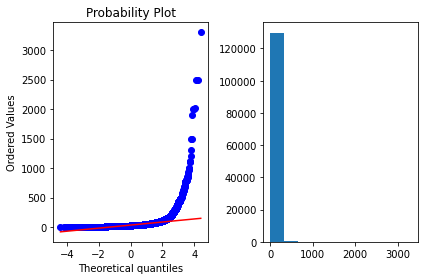

In [26]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_df['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_df['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.

Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.

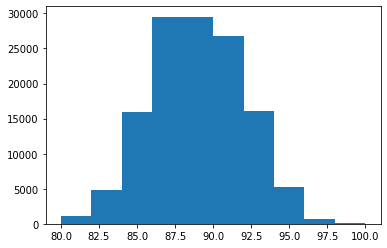

In [28]:
plt.hist(wine_df['points']);

## Ранговая корреляция

**Ранговая корреляция** — это вид корреляции, отражающий отношения переменных, упорядоченных по возрастанию их значения. 

**Ранги** — это порядковые номера единиц совокупности в упорядоченном (ранжированном) ряду. Если проранжировать совокупность по двум признакам, связь между которыми изучается, то полное совпадение рангов означает максимально тесную прямую связь, а полная противоположность рангов — максимально тесную обратную связь.

**Коэффициент корреляции Спирмена** используется для вычисления взаимосвязей между категориальными переменными.

In [30]:
wine_df.corr(method='spearman')

,points,price
points,1.000000,0.581095
price,0.581095,1.000000


Иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены ненормально или если между ними существует нелинейная связь.

Лучшим вариантом будет придерживаться правил корреляций каждого из методов: для непрерывных нормально распределённых используем корреляцию Пирсона, для категориальных — ранговую. Однако в спорных случаях мы рассматриваем несколько вариантов корреляций. 

# Корреляция Кендалла

Так же, как и корреляция Спирмена, корреляция Кендала предусмотрена для нахождения взаимосвязей между категориальными переменными. Для расчёта коэффициента корреляции Кендалла необходимо передать в изученный нами метод df.corr() аргумент method = 'kendall'. 

In [31]:
wine_df.corr(method='kendall')

,points,price
points,1.000000,0.433498
price,0.433498,1.000000


Корреляции Спирмена и Кендалла очень похожи. Чтобы понять их различия, необходимо глубокое погружение в их математическую природу. Однако в среднем корреляция Кендала выдаёт меньшие значения коэффициента корреляции, чем корреляция Спирмена. 

Корреляция Кендалла более устойчива к ошибкам и выбросам в данных. Это значит, что её можно применить до очистки данных, чтобы выявить взаимосвязи заранее. Применение в этом случае корреляции Спирмена, как и корреляции Пирсона, не вызовет ошибки, но, скорее всего, некорректность расчёта приведёт к неверным выводам.

# Корреляция Мэтьюса

Бинарные признаки являются подгруппой категориальных. Мы по-прежнему можем использовать методы ранговых корреляций для расчёта связи между переменными. 

Кроме этого, существует **корреляция Мэтьюса** — мера силы связи между бинарными переменными.

В df.corr() нет расчёта для корреляции Мэтьюса, но мы можем воспользоваться библиотекой scikit-learn и её функцией matthews_corrcoef() для расчёта коэффициента корреляции Мэтьюса.

In [32]:
from sklearn.metrics import matthews_corrcoef

In [33]:
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны. 